<a href="https://colab.research.google.com/github/geesri98/AIML-Projects/blob/master/pyrotonumpyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpyro
!pip install jax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 8.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import jax.numpy as jnp
from jax import random

In [4]:
def sir_model(data):
    N = 10000  # population size
    T = len(data)  # number of time steps

    # Priors
    beta = numpyro.sample("beta", dist.Uniform(0, 1))
    gamma = numpyro.sample("gamma", dist.Uniform(0, 1))

    # Initial conditions
    S0 = N - 1
    I0 = 1
    R0 = 0

    # SIR dynamics
    def sir_ode(S, I, R, beta, gamma):
        dS = -beta * S * I / N
        dI = beta * S * I / N - gamma * I
        dR = gamma * I
        return dS, dI, dR

    S, I, R = S0, I0, R0
    for t in range(T):
        dS, dI, dR = sir_ode(S, I, R, beta, gamma)
        S += dS
        I += dI
        R += dR

        # Observation model
        numpyro.sample(f"obs_{t}", dist.Poisson(I), obs=data[t])

In [5]:
# Generate synthetic data
def generate_data(T=100, beta=0.3, gamma=0.1, N=10000):
    S, I, R = N - 1, 1, 0
    data = []
    for _ in range(T):
        S, I, R = S - beta * S * I / N, I + beta * S * I / N - gamma * I, R + gamma * I
        data.append(np.random.poisson(I))
    return np.array(data)

# Set up MCMC
def run_inference(data, num_warmup=1000, num_samples=1000):
    kernel = NUTS(sir_model)
    mcmc = MCMC(kernel, num_warmup=num_warmup, num_samples=num_samples)
    mcmc.run(random.PRNGKey(0), data)
    return mcmc

# Generate data and run inference
data = generate_data()
mcmc = run_inference(data)

# Print results
print(mcmc.print_summary())

sample: 100%|██████████| 2000/2000 [00:17<00:00, 115.07it/s, 7 steps of size 2.65e-01. acc. prob=0.93] 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
      beta      0.30      0.00      0.30      0.30      0.30    418.11      1.00
     gamma      0.10      0.00      0.10      0.10      0.10    258.47      1.00

Number of divergences: 0
None


In [6]:
'''
This function does the following:
It simulates an SIR model over a specified number of days.
It uses the given parameters (N, I0, R0, beta, gamma) to evolve the epidemic.
It adds some randomness by using a Poisson distribution to generate the observed daily case counts.
'''
import numpy as np

def generate_synthetic_epidemic_data(
    N=10000,  # Total population
    I0=100,   # Initial number of infected individuals
    R0=0,     # Initial number of recovered individuals
    beta=0.3, # Infection rate
    gamma=0.1,# Recovery rate
    days=100  # Number of days to simulate
):
    # Initialize arrays
    S = np.zeros(days)
    I = np.zeros(days)
    R = np.zeros(days)

    # Set initial conditions
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0

    # Simulate the epidemic
    for t in range(1, days):
        # Calculate new infections and recoveries
        new_infections = beta * S[t-1] * I[t-1] / N
        new_recoveries = gamma * I[t-1]

        # Update S, I, R
        S[t] = S[t-1] - new_infections
        I[t] = I[t-1] + new_infections - new_recoveries
        R[t] = R[t-1] + new_recoveries

        # Ensure values are non-negative
        S[t] = max(0, S[t])
        I[t] = max(0, I[t])
        R[t] = max(0, R[t])

    # Generate observed data (daily new cases) with some noise
    observed_cases = np.random.poisson(I)

    return observed_cases

# Generate example data
example_data = generate_synthetic_epidemic_data()

print("Example synthetic epidemic data (daily new cases):")
print(example_data)

Example synthetic epidemic data (daily new cases):
[ 107   94  139  172  208  229  290  368  433  473  593  679  771  915
 1069 1240 1407 1599 1819 1961 2163 2375 2506 2843 2952 3008 3112 3231
 3096 3210 3143 2981 2950 2850 2688 2584 2417 2350 2183 2065 1941 1758
 1717 1549 1410 1317 1275 1177 1063  938  916  858  808  678  626  586
  525  535  445  432  389  349  344  306  265  265  225  208  206  180
  164  145  158  129  110  100   96   96   96   79   79   67   54   59
   52   49   45   42   30   34   32   30   31   23   24   19   17   16
   14   11]


In [ ]:
# Generate synthetic data
observed_data = generate_synthetic_epidemic_data()

# Use this data in your NumPyro model
def sir_model(data):
    # ... (your NumPyro model implementation here)

# Run inference
mcmc = run_inference(observed_data)

# Print results
print(mcmc.print_summary())

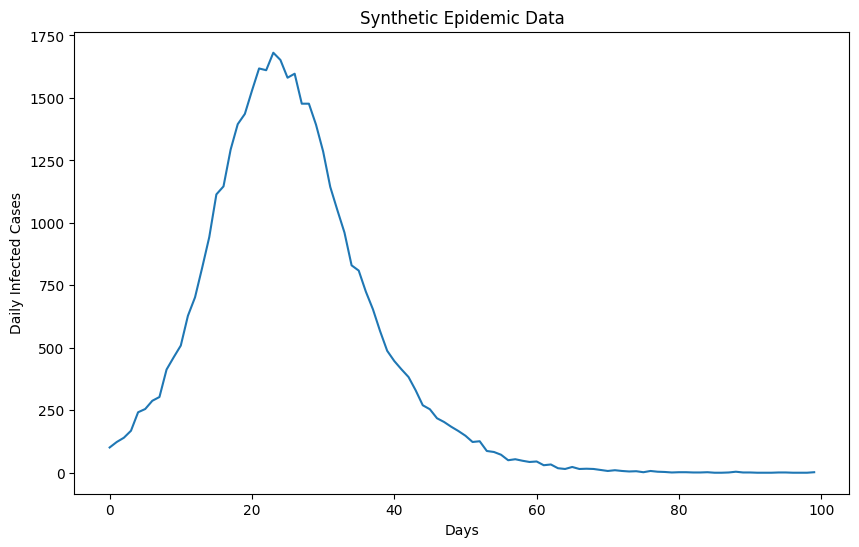

sample: 100%|██████████| 3000/3000 [00:20<00:00, 145.55it/s, 7 steps of size 5.44e-01. acc. prob=0.91] 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
      beta      0.39      0.00      0.39      0.39      0.39    946.83      1.01
     gamma      0.20      0.00      0.20      0.20      0.20    897.12      1.01

Number of divergences: 0
None


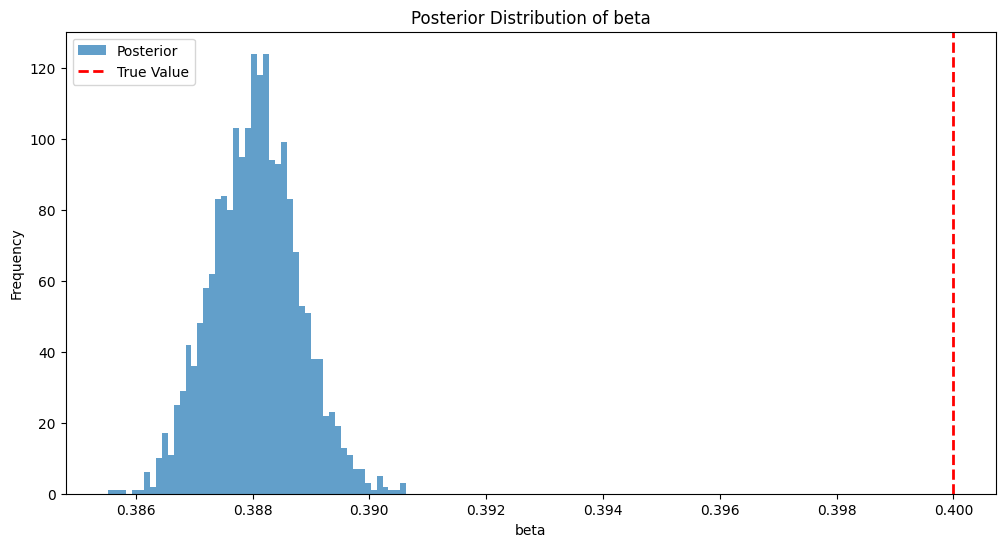

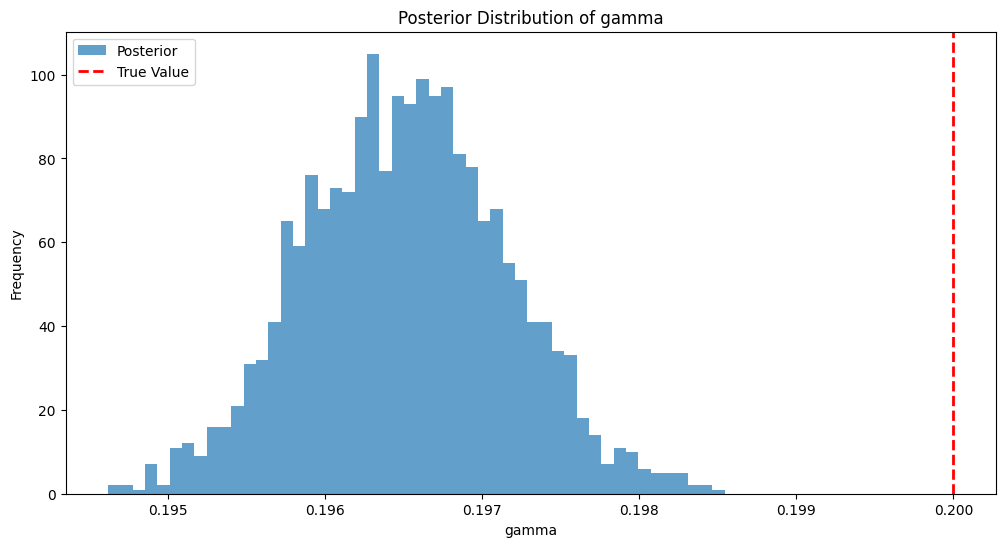

True beta: 0.4000, Estimated beta: 0.3881
True gamma: 0.2000, Estimated gamma: 0.1965


In [7]:
import numpy as np
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)
numpyro.set_host_device_count(4)  # Adjust based on your hardware

# Synthetic data generation function
def generate_synthetic_epidemic_data(
    N=10000,  # Total population
    I0=100,   # Initial number of infected individuals
    R0=0,     # Initial number of recovered individuals
    beta=0.4, # Infection rate
    gamma=0.2,# Recovery rate
    days=100  # Number of days to simulate
):
    S = np.zeros(days)
    I = np.zeros(days)
    R = np.zeros(days)

    S[0], I[0], R[0] = N - I0 - R0, I0, R0

    for t in range(1, days):
        new_infections = beta * S[t-1] * I[t-1] / N
        new_recoveries = gamma * I[t-1]

        S[t] = max(0, S[t-1] - new_infections)
        I[t] = max(0, I[t-1] + new_infections - new_recoveries)
        R[t] = max(0, R[t-1] + new_recoveries)

    observed_cases = np.random.poisson(I)

    return observed_cases

# Generate synthetic data
true_beta, true_gamma = 0.4, 0.2
data = generate_synthetic_epidemic_data(beta=true_beta, gamma=true_gamma)

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Synthetic Epidemic Data")
plt.xlabel("Days")
plt.ylabel("Daily Infected Cases")
plt.show()

# Define the SIR model in NumPyro
def sir_model(data):
    N = 10000  # population size
    T = len(data)  # number of time steps

    # Priors
    beta = numpyro.sample("beta", dist.Uniform(0, 1))
    gamma = numpyro.sample("gamma", dist.Uniform(0, 1))

    # Initial conditions
    S0 = N - 100
    I0 = 100
    R0 = 0

    # SIR dynamics
    def sir_ode(S, I, R, beta, gamma):
        dS = -beta * S * I / N
        dI = beta * S * I / N - gamma * I
        dR = gamma * I
        return dS, dI, dR

    S, I, R = S0, I0, R0
    for t in range(T):
        dS, dI, dR = sir_ode(S, I, R, beta, gamma)
        S += dS
        I += dI
        R += dR

        # Observation model
        numpyro.sample(f"obs_{t}", dist.Poisson(I), obs=data[t])

# Set up and run MCMC
def run_inference(data, num_warmup=1000, num_samples=2000):
    kernel = NUTS(sir_model)
    mcmc = MCMC(kernel, num_warmup=num_warmup, num_samples=num_samples)
    mcmc.run(random.PRNGKey(0), data)
    return mcmc

# Run inference
mcmc = run_inference(data)

# Print results
print(mcmc.print_summary())

# Extract and plot posterior samples
samples = mcmc.get_samples()

plt.figure(figsize=(12, 6))
plt.hist(samples['beta'], bins=50, alpha=0.7, label='Posterior')
plt.axvline(true_beta, color='r', linestyle='dashed', linewidth=2, label='True Value')
plt.title("Posterior Distribution of beta")
plt.xlabel("beta")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(samples['gamma'], bins=50, alpha=0.7, label='Posterior')
plt.axvline(true_gamma, color='r', linestyle='dashed', linewidth=2, label='True Value')
plt.title("Posterior Distribution of gamma")
plt.xlabel("gamma")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Print true values and posterior means
print(f"True beta: {true_beta:.4f}, Estimated beta: {samples['beta'].mean():.4f}")
print(f"True gamma: {true_gamma:.4f}, Estimated gamma: {samples['gamma'].mean():.4f}")

Homework

In [ ]:
# Epidemiological Modeling with NumPyro - Homework

import numpy as np
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)
numpyro.set_host_device_count(4)  # Adjust based on your hardware

# Synthetic data generation function (provided)
def generate_synthetic_epidemic_data(
    N=10000,  # Total population
    I0=100,   # Initial number of infected individuals
    R0=0,     # Initial number of recovered individuals
    beta=0.3, # Infection rate
    gamma=0.1,# Recovery rate
    days=100  # Number of days to simulate
):
    S = np.zeros(days)
    I = np.zeros(days)
    R = np.zeros(days)

    S[0], I[0], R[0] = N - I0 - R0, I0, R0

    for t in range(1, days):
        new_infections = beta * S[t-1] * I[t-1] / N
        new_recoveries = gamma * I[t-1]

        S[t] = max(0, S[t-1] - new_infections)
        I[t] = max(0, I[t-1] + new_infections - new_recoveries)
        R[t] = max(0, R[t-1] + new_recoveries)

    observed_cases = np.random.poisson(I)

    return observed_cases

# Generate synthetic data
true_beta, true_gamma = 0.3, 0.1
data = generate_synthetic_epidemic_data(beta=true_beta, gamma=true_gamma)

# Task 1: Plot the synthetic data
# Your code here

# Task 2: Define the SIR model in NumPyro
def sir_model(data):
    N = 10000  # population size
    T = len(data)  # number of time steps

    # Task 2a: Define priors for beta and gamma
    # Your code here

    # Initial conditions
    S0 = N - 100
    I0 = 100
    R0 = 0

    # SIR dynamics
    def sir_ode(S, I, R, beta, gamma):
        # Task 2b: Implement the SIR differential equations
        # Your code here
        return dS, dI, dR

    S, I, R = S0, I0, R0
    for t in range(T):
        dS, dI, dR = sir_ode(S, I, R, beta, gamma)
        S += dS
        I += dI
        R += dR

        # Task 2c: Define the observation model
        # Your code here

# Task 3: Implement the MCMC inference function
def run_inference(data, num_warmup=1000, num_samples=2000):
    # Your code here
    return mcmc

# Task 4: Run inference and print results
# Your code here

# Task 5: Extract and plot posterior samples
# Your code here

# Task 6: Compare true values with posterior means
# Your code here


Solution

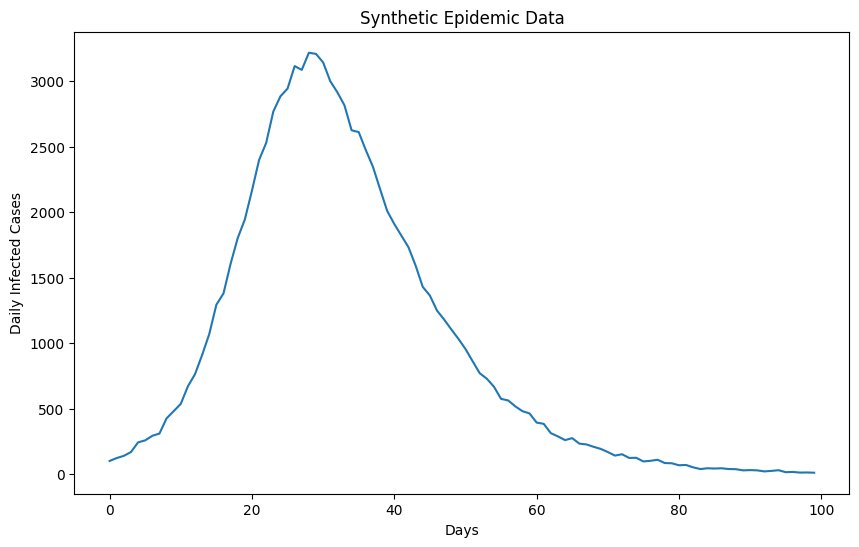

sample: 100%|██████████| 3000/3000 [00:19<00:00, 151.16it/s, 3 steps of size 4.48e-01. acc. prob=0.94]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
      beta      0.29      0.00      0.29      0.29      0.29   1453.30      1.00
     gamma      0.10      0.00      0.10      0.10      0.10    953.03      1.00

Number of divergences: 0
None


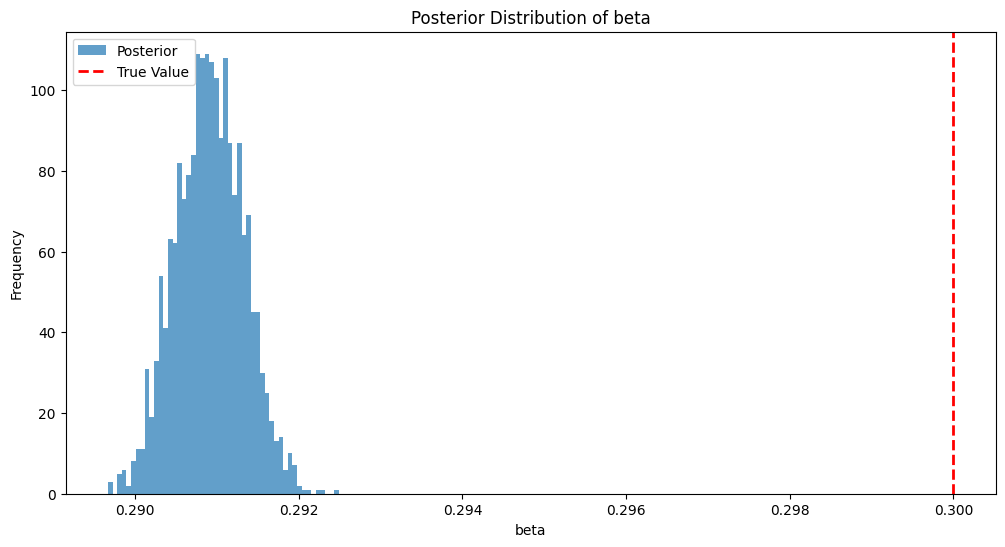

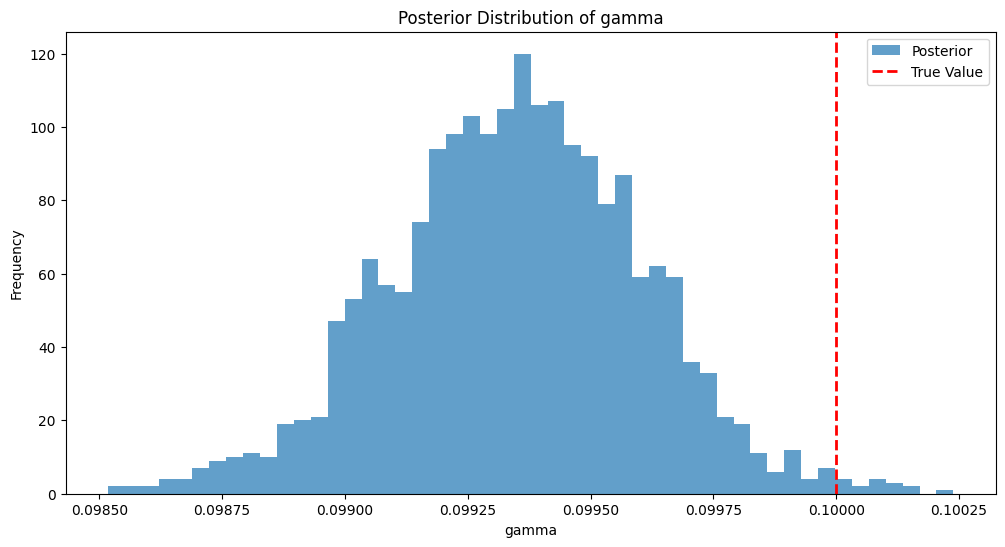

True beta: 0.3000, Estimated beta: 0.2909
True gamma: 0.1000, Estimated gamma: 0.0993


In [8]:
# Epidemiological Modeling with NumPyro - Solution

import numpy as np
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)
numpyro.set_host_device_count(4)  # Adjust based on your hardware

# Synthetic data generation function (provided)
def generate_synthetic_epidemic_data(
    N=10000,  # Total population
    I0=100,   # Initial number of infected individuals
    R0=0,     # Initial number of recovered individuals
    beta=0.3, # Infection rate
    gamma=0.1,# Recovery rate
    days=100  # Number of days to simulate
):
    S = np.zeros(days)
    I = np.zeros(days)
    R = np.zeros(days)

    S[0], I[0], R[0] = N - I0 - R0, I0, R0

    for t in range(1, days):
        new_infections = beta * S[t-1] * I[t-1] / N
        new_recoveries = gamma * I[t-1]

        S[t] = max(0, S[t-1] - new_infections)
        I[t] = max(0, I[t-1] + new_infections - new_recoveries)
        R[t] = max(0, R[t-1] + new_recoveries)

    observed_cases = np.random.poisson(I)

    return observed_cases

# Generate synthetic data
true_beta, true_gamma = 0.3, 0.1
data = generate_synthetic_epidemic_data(beta=true_beta, gamma=true_gamma)

# Task 1: Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Synthetic Epidemic Data")
plt.xlabel("Days")
plt.ylabel("Daily Infected Cases")
plt.show()

# Task 2: Define the SIR model in NumPyro
def sir_model(data):
    N = 10000  # population size
    T = len(data)  # number of time steps

    # Task 2a: Define priors for beta and gamma
    beta = numpyro.sample("beta", dist.Uniform(0, 1))
    gamma = numpyro.sample("gamma", dist.Uniform(0, 1))

    # Initial conditions
    S0 = N - 100
    I0 = 100
    R0 = 0

    # SIR dynamics
    def sir_ode(S, I, R, beta, gamma):
        # Task 2b: Implement the SIR differential equations
        dS = -beta * S * I / N
        dI = beta * S * I / N - gamma * I
        dR = gamma * I
        return dS, dI, dR

    S, I, R = S0, I0, R0
    for t in range(T):
        dS, dI, dR = sir_ode(S, I, R, beta, gamma)
        S += dS
        I += dI
        R += dR

        # Task 2c: Define the observation model
        numpyro.sample(f"obs_{t}", dist.Poisson(I), obs=data[t])

# Task 3: Implement the MCMC inference function
def run_inference(data, num_warmup=1000, num_samples=2000):
    kernel = NUTS(sir_model)
    mcmc = MCMC(kernel, num_warmup=num_warmup, num_samples=num_samples)
    mcmc.run(random.PRNGKey(0), data)
    return mcmc

# Task 4: Run inference and print results
mcmc = run_inference(data)
print(mcmc.print_summary())

# Task 5: Extract and plot posterior samples
samples = mcmc.get_samples()

plt.figure(figsize=(12, 6))
plt.hist(samples['beta'], bins=50, alpha=0.7, label='Posterior')
plt.axvline(true_beta, color='r', linestyle='dashed', linewidth=2, label='True Value')
plt.title("Posterior Distribution of beta")
plt.xlabel("beta")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(samples['gamma'], bins=50, alpha=0.7, label='Posterior')
plt.axvline(true_gamma, color='r', linestyle='dashed', linewidth=2, label='True Value')
plt.title("Posterior Distribution of gamma")
plt.xlabel("gamma")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Task 6: Compare true values with posterior means
print(f"True beta: {true_beta:.4f}, Estimated beta: {samples['beta'].mean():.4f}")
print(f"True gamma: {true_gamma:.4f}, Estimated gamma: {samples['gamma'].mean():.4f}")